This is a mdp(Markov decision process) model for simple grid world from Ch.17 of [Artificial Intelligence:A Modern Approach](http://aima.cs.berkeley.edu/).

In [139]:
%matplotlib inline
import matplotlib.pylab as plt
import random
import pandas as pd
import numpy as np

In [121]:
##模型定义 4x3的网格世界，世界状态集合
all_states = {(i,j) for i in range(4) for j in range(3) if not (i==1 and j==1) }
end_states = {(3,1),(3,2)}
move_states = all_states-end_states
actions = ["U","D","L","R"]
common_reward = -0.04
rewards = {state:common_reward for state in move_states}
rewards[(3,2)] = 1.0 ## positive end state 
rewards[(3,1)] = -1.0 ## negative end state
right_acion_pro = 0.8
wrong_action_pro = 0.1
policy = dict()

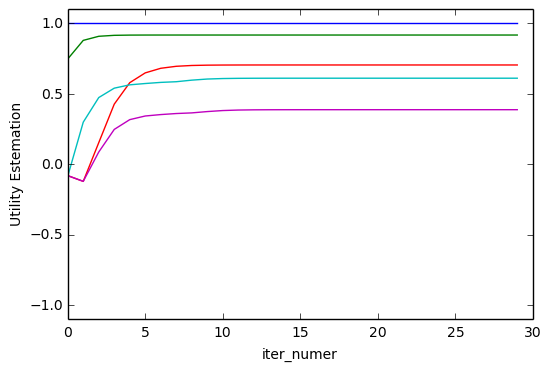

In [151]:
### utility 是在当前状态下未来奖赏的期望值
utility = np.zeros((4,3))
#初始化
for idx, value in rewards.items():
    utility[idx] = value    
def next_state(state, action):
    i, j = state
    if action == "U" :
        if j == 2 or (i == 1 and j == 0):
            _next_state = (i,j)
        else:
            _next_state = (i, j+1)
    if action == "D" :
        if j == 0 or (i == 1 and j == 2):
            _next_state = (i,j)
        else:
            _next_state = (i, j-1)
    if action == "L" :
        if i == 0 or (i == 2 and j == 1):
            _next_state = (i,j)
        else:
            _next_state = (i-1, j)
    if action == "R" :
        if i == 3 or (i == 0 and j == 1):
            _next_state = (i,j)
        else:
            _next_state = (i+1,j)
    
    return _next_state
            
    
                
# 迭代
iter_num = 30
data = []
for i in range(iter_num):
    for state in move_states:
        #print state
        Uu = 0.8*utility[next_state(state, "U")]  + 0.1*utility[ next_state(state, "L")]  + 0.1*utility[ next_state(state, "R") ]
        Ud = 0.8*utility[next_state(state, "D")] + 0.1*utility[next_state(state, "L")]+ 0.1*utility[next_state(state, "R")]
        Ul = 0.8*utility[next_state(state, "L")] + 0.1*utility[next_state(state, "D")] + 0.1*utility[next_state(state, "U")]
        Ur = 0.8*utility[next_state(state, "R")] + 0.1*utility[next_state(state, "D")] + 0.1*utility[next_state(state, "U")]
        Us = [Uu,Ud,Ul,Ur]
        Um = max(Us)
        ## 策略更新
        policy[state] = actions[Us.index(Um)]
        ## utility价值更新
        utility[state] = rewards[state] + Um
        
    data.append([utility[3,2], utility[2,2], utility[0,0],utility[2,0],utility[3,0],])
     

plt.figure()    
plt.plot(range(iter_num), data)
plt.text()
plt.ylim(-1.1,1.1)
plt.ylabel("Utility Estemation")
plt.xlabel("iter_numer")
plt.show()

In [152]:
policy

{(0, 0): 'U',
 (0, 1): 'U',
 (0, 2): 'R',
 (1, 0): 'L',
 (1, 2): 'R',
 (2, 0): 'L',
 (2, 1): 'U',
 (2, 2): 'R',
 (3, 0): 'L'}